In [42]:
%matplotlib inline
from numpy import loadtxt
from keras.models import load_model
from PIL import Image
%matplotlib inline
import numpy as np
import pandas as pd 
from skimage import io, color
import skimage
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os


from keras import *
from keras.layers import *
from keras.activations import *
from keras.optimizers import *
from matplotlib import pyplot as plt
from utils import *
from keras.initializers import RandomNormal, Zeros

In [43]:


def display(img):
    plt.figure()
    plt.set_cmap('gray')
    plt.imshow(img)
    plt.show()


def combineLAB(l, a, b):
    shape = (l.shape[0], l.shape[1], 3)
    zeros = np.zeros(shape)
    zeros[:, :, 0] = l
    zeros[:, :, 1] = a
    zeros[:, :, 2] = b
    return zeros


def combineAB(a, b):
    shape = (a.shape[0], b.shape[1], 2)
    zeros = np.zeros(shape)
    zeros[:, :, 0] = a
    zeros[:, :, 1] = b
    return zeros


def combineL_AB(l, ab):
    shape = (l.shape[0], l.shape[1], 3)
    zeros = np.zeros(shape)
    zeros[:, :, 0] = l
    zeros[:, :, 1] = ab[:, :, 0]
    zeros[:, :, 2] = ab[:, :, 1]
    return zeros


def make3channels(gray):
    shape = (gray.shape[0], gray.shape[1], 3)
    zeros = np.zeros(shape)
    zeros[:, :, 0] = gray
    zeros[:, :, 1] = gray
    zeros[:, :, 2] = gray
    return zeros


def get_l_from_gray(img_path):
    img = io.imread(img_path)
    img = skimage.transform.resize(img,(64,64))
    gray = color.rgb2gray(img)
    gray = make3channels(gray)
    lgray = color.rgb2lab(gray, illuminant='D50')[:, :, 0]
    return lgray


def get_ab_from_file(file):
    img = io.imread(file)
    ab = np.zeros((64, 64, 2))
    ab[:, :, 0] = img[:, :, 1]
    ab[:, :, 1] = img[:, :, 2]
    return ab


def lab_normal_image(path):
    l, ab = load_img_for_training(path)
    l, ab = (l-127.5)/127.5, (ab-127.5)/127.5
    return l, ab


def rgb_image(l, ab):
    shape = (l.shape[0],l.shape[1],3)
    img = np.zeros(shape)
    img[:,:,0] = l[:,:,0]
    img[:,:,1:]= ab
    img = img.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    return img


def load_img_for_training(img_path):
    img = io.imread(img_path)
    img = skimage.transform.resize(img,(64,64))
    lab = color.rgb2lab(img, illuminant='D50')
    l, a, b = lab[:, :, 0], lab[:, :, 1], lab[:, :, 2]
    ab = combineAB(a, b)
    lgray = get_l_from_gray(img_path)
    return lgray, ab


def save_ab_file(image, filepath):
    # add in 0zeros to its first component
    shape = (image.shape[0], image.shape[1], 3)
    new_ab_image = np.zeros(shape)
    new_ab_image[:, :, 1] = image[:, :, 0]
    new_ab_image[:, :, 2] = image[:, :, 1]
    save_file(new_ab_image, filepath)


def save_file(image, filepath):
    io.imsave(filepath, image)


def load_ab_image(path):
    img = io.imread(path)
    shape = (img.shape[0], img.shape[1], 2)
    ab = np.zeros(shape)
    ab[:, :, 0] = img[:, :, 1]
    ab[:, :, 1] = img[:, :, 2]
    return ab



In [44]:
def normalize(image):
    # convert image from range 0-256 to 
    #image = cv2.resize(image, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
    image = image/255
    return image

def unnormalize(image):
    image = (image*255)
    return image.astype('uint8')

In [51]:


gray_scale = np.load('C:/Users/Linami/test/l/gray_scale.npy')[:5999]
ab_scale = np.load('C:/Users/Linami/test/ab/ab/ab1.npy')[:6000]
print(gray_scale.shape)
print(ab_scale.shape)



(5999, 224, 224)
(6000, 224, 224, 2)


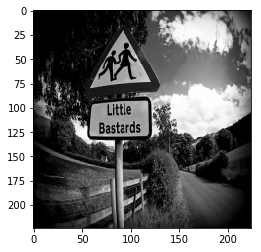

(224, 224)


In [52]:
#img = os.listdir("DLFiles/images_upload/")
#img = os.listdir('./')
#img = img[len(img) - 1]
#pathname = 'DLFiles/images_upload/{}'.format(img)
#pathname = './{}'.format(img)
def imgtoSizeNeeded(imgpath, size):
    img = Image.open(imgpath).convert('LA')
    data = np.asarray( img, dtype="uint8" )
    img = data[:, :, 0]
    img = cv2.resize(img, size)
    display(img)
    print(img.shape)
    img = np.expand_dims(img, axis=0)
    return img

img = imgtoSizeNeeded('img_2.png', (224,224))
gray_scale = np.concatenate((gray_scale, img), axis=0)

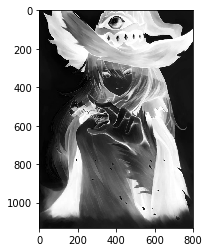

In [101]:
'''
WIP

img = cv2.imread('test6.jpg', cv2.IMREAD_UNCHANGED)
img_gray = 255 - img[:, :, 2]

plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.show()
'''

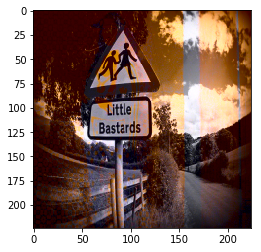

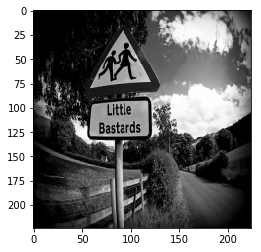

In [53]:
index = 5999
l_sample,ab_sample = gray_scale[index].reshape((224,224,1)),ab_scale[index]
rgb_sample = rgb_image(l_sample,ab_sample)
display(rgb_sample)
display(l_sample[:,:,0])

In [54]:
x = np.zeros((6000,224,224,1))
y = np.zeros((6000,224,224,2))

for i in range(6000):
    l_sample = normalize(gray_scale[i])
    ab_sample = normalize(ab_scale[i])
    x[i] = l_sample.reshape((224,224,1))
    y[i] = ab_sample  

In [ ]:
inputs = Input((224, 224, 1))
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)


In [ ]:
up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
conv10 = Conv2D(2, (3, 3), activation='relu', padding='same')(conv9)

model = Model(inputs=[inputs], outputs=[conv10])
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

In [39]:
model = load_model('model.h5')
# summarize model.
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 224, 224, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 112, 112, 32) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [ ]:
def residual_block(feature, dropout=False):
    x = Conv2D(128, kernel_size=3, strides=1, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(feature)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    if dropout:
        x = Dropout(0.5)(x)
    x = Conv2D(128, kernel_size=3, strides=1, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return Add()([feature, x])


def build_model(n_block=5):
    image_size = 224
    input_channel = 1
    output_channel = 2
    input = Input(shape=(image_size, image_size, input_channel))
    x = Conv2D(224, kernel_size=7, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(input)  # use reflection padding instead
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # downsample
    x = Conv2D(200, kernel_size=3, strides=2, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # downsample
    x = Conv2D(128, kernel_size=3, strides=2, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    for i in range(n_block):
        x = residual_block(x)
    # upsample
    x = Conv2DTranspose(200, kernel_size=3, strides=2, padding='same',
                        kernel_initializer=RandomNormal(mean=0.0, stddev=0.02), bias_initializer=Zeros())(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # upsample
    x = Conv2DTranspose(224, kernel_size=3, strides=2, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # out
    x = Conv2D(output_channel, kernel_size=7, padding='same', kernel_initializer=RandomNormal(
        mean=0.0, stddev=0.02), bias_initializer=Zeros())(x)  # use reflection padding instead
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    model = Model(inputs=input, outputs=x)
    model.summary()
    return model


    

def save_images(generator, samples):
    ab_values = generator.predict(samples)
    plt.figure()
    plt.set_cmap('gray')
    for i in range(ab_values.shape[0]):
        l_val = unnormalize(samples[i])
        ab_val = unnormalize(ab_values[i])
        rgb = rgb_image(l_val, ab_val)
        if i == 0:
            display(rgb)
        ax = plt.subplot(224, 224, i+1)
        im = ax.imshow(rgb)
        plt.tight_layout()
        plt.title(i)
    plt.show()
    plt.savefig('gan_generated_image.jpg')


    
def train_network(x_data,y_data,epochs=100, batch_size=128, save_interval=5):
    input_shape = (224, 224, 1)
    output_shape = (224, 224, 2)
    model = build_model(0)
    model.compile(optimizer='adam', loss='mse', metrics=['mse','acc'])
    history = model.fit(x_data,y_data,validation_split=0.1,epochs=epochs,batch_size=128,)
    model.save('model.h5')
    print("MODEL SAVED")
    return model,history
    

In [55]:
samples = x[5999:6000]

In [56]:
import matplotlib
a = model.predict(samples)
plt.figure()
plt.set_cmap('gray')
for i in range(a.shape[0]):
    l_val = unnormalize(samples[i])
    ab_val = unnormalize(a[i])
    rgb = rgb_image(l_val, ab_val)
    matplotlib.image.imsave("result/img_"+str(i)+".png", rgb)

<Figure size 432x288 with 0 Axes>